In [108]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

### perceptron 
binary classes coded as {-1, 1}, while for logistic regression it's {0, 1}


In [292]:
# iris data 
d = pd.read_csv('Iris.csv')
x = d[d.columns[1: -1]]
x.columns = ['sepallen', 'sepalwid', 'petallen', 'petalwid']
# change the binary classes label coding 
mapping = {'Iris-setosa': -1, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = d[d.columns[-1]].replace(mapping)

# only consider two features first 
# slcie for the binary data {-1, 1}
x2 = x[y != 1][['sepallen', 'sepalwid']] # first two 
x3 = x[y != 1][['petallen', 'petalwid']] # last two
y2 = y[y != 2]

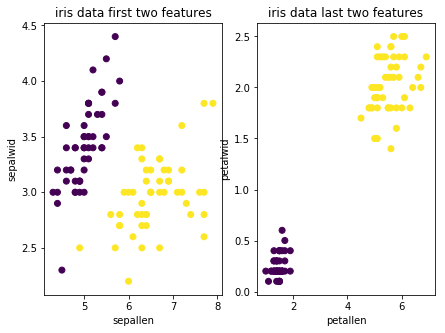

In [385]:
# check if the two classes are linearly seperable 

plt.figure(figsize = (7, 5))
plt.subplot(1, 2, 1)
plt.scatter(x2.iloc[:,0], x2.iloc[:,1], c = y2)
plt.title('iris data first two features')
plt.xlabel('sepallen')
plt.ylabel('sepalwid')
# data may not be linearly seperable in this case 

plt.subplot(1, 2, 2)
plt.scatter(x3.iloc[:,0], x3.iloc[:,1], c = y2)
plt.title('iris data last two features')
plt.xlabel('petallen')
plt.ylabel('petalwid')

In [228]:
# percpetron training and loss visualization in each epoch

def perceptron_sgd_plot(X, y,  add_bias = False):
    # x and y have to be np arrays   
    if add_bias:
        # add bais temrs to the weight vector 
        bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack((X, bias))

    total_error = []
    
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 300

    for epoch in range(epochs):
        epoch_error = 0
        for i in range(X.shape[0]):
            # update weights only when classification is wrong 
            if (np.dot(X[i], w)* y[i]) <= 0:
                w = w + eta*X[i]* y[i]
                
                epoch_error += np.dot(X[i], w)* y[i]
        total_error.append(epoch_error)
    
    
    plt.figure(figsize = (7, 5))
    plt.plot(total_error)
    plt.xlabel('Epoches')
    plt.ylabel('Loss')
    plt.show()
    
    return w

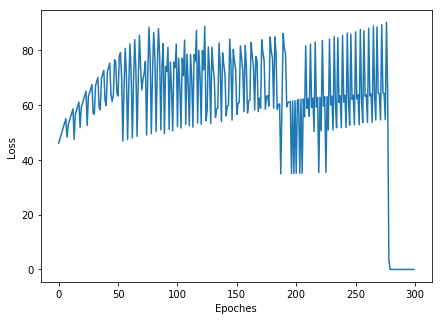

[ 51.8 -76.  -62. ]


In [229]:
# plot and show weights 
weights = perceptron_sgd_plot(x2.values, y2.values, add_bias = True)
print (weights)

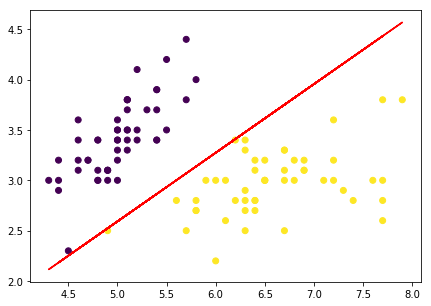

In [230]:
# hyperplane visualization  

plt.figure(figsize = (7, 5))
# training sample
plt.scatter(x2.iloc[:,0], x2.iloc[:,1], c = y2)

w1 = weights[0]
w2 = weights[1]
w3 = weights[2]

# plot the hyperplane function - one feature one axis 
def hype(x2):
    return -(w3/ w2) - (w1/ w2)*x2.iloc[:, 0]   

# hyperplane 
# plt.plot((0, - w3/ w2), (- w3/ w1, 0))  
plt.plot(x2.iloc[:, 0], hype(x2), c = 'r')

In [231]:
# accuracy 
final = np.dot(np.hstack((x2, np.ones((x2.shape[0], 1)))), weights)* y2

# prediction is incorrect when final is less than zero
print ('Accuracy: '+ str((1 - np.sum(final < 0))*100) + "%")

Accuracy: 100%


### compare with scikit learn perceptron 

In [115]:
from sklearn.linear_model import perceptron

sktp = perceptron.Perceptron(max_iter = 100, verbose=0, random_state = None, fit_intercept = True)
sktp.fit(x2, y2)
 
# Print the results
# print ("Prediction: " + str(sktp.predict(x2)))
# print ("Actual: " + str(y2))
print ("Accuracy: " + str(sktp.score(x2, y2)*100) + "%")
print ('scikit-learn weights{0}{1} :'.format(sktp.intercept_, sktp.coef_))

Accuracy: 99.0%
scikit-learn weights[-41.][[ 46.6 -67.4]] :


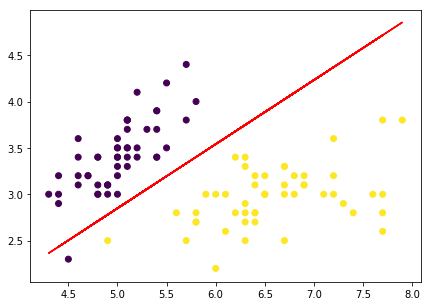

In [116]:
# plot the decision boundary
# perceptron decision function is sgn(w1*x1 + w2*x2 + w3) then the decision boundary equation is a line with canonical form w1*x1 + w2*x2 + w3 = 0.
# to plot such equation: draw a line through (0,-w3/w2) and (-w3/w1,0) (assuming that both w1 and w2 are non-zero)


plt.figure(figsize = (7, 5))
# training sample
plt.scatter(x2.iloc[:,0], x2.iloc[:,1], c = y2)

w1 = sktp.coef_[0][0]
w2 = sktp.coef_[0][1]
w3 = sktp.intercept_

# plot the hyperplane function - one feature one axis 
def hype(x2):
    return -(w3/ w2) - (w1/ w2)*x2.iloc[:, 0]   

# hyperplane 
# plt.plot((0, - w3/ w2), (- w3/ w1, 0))  
plt.plot(x2.iloc[:, 0], hype(x2), c = 'r')

### from perceptron to SVM

http://compneurosci.com/wiki/images/4/4f/Support_Vector_Machines_%28SVM%29.pdf

#### hinge loss

In [50]:
# define loss function and objective function 
# The hinge loss, max(0, 1 - y*f(x)), is used for "maximum-margin" classification, most notably for SVMs.
# if y*f(x) >= 1, zero loss, if y*f(x) < 1, 1 - y*f(x) is the loss.

# objective function, parameterized by the weight vector w, is made of loss and the regularization term
# regularizer is necessary because of the presence of outliers
# dual(minimization) form of the margin maximization objective 
# objective function is optimized by stochastic gradient descent

In [461]:
# SVM training(stochastic gradient descent) and loss visualization in each epoch - iris data 

def svm_sgd_plot(X, y,  add_bias = False):
    # x and y have to be np arrays   
    if add_bias:
        # add bais temrs to the weight vector 
        bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack((X, bias))
   
    # store misclassification
    total_error = []
    # initialize the weight vector with zeros
    w = np.zeros(len(X[0]))
    # learning rate
    lrate = 0.001
    # penalty term on the weights vector 
    # in scikit learn package, C = 1/lambda, which is the coefficient before the hinge loss part in the objective function.
    lamb = 1
    # number of iterations 
    epochs = 300
 
    # the training 
    for epoch in range(1, epochs):
        epoch_error = 0
        for i in range(X.shape[0]):
            # account for misclassification y*f(x) < 1 
            if (y[i]* np.dot(X[i], w)) < 1:
                epoch_error += lamb/2 * np.linalg.norm(w) + np.dot(X[i], w)* y[i]
                # weight vector update when the classification is incorrect 
                w = w + lrate * (X[i] * y[i] - lamb * (1/epoch)* w)
            else:
                # weight vector update when the classification is correct
                w = w - lrate * lamb * (1/epoch) * w
                epoch_error += lamb/2 * np.linalg.norm(w)
        total_error.append(epoch_error)
    
    
    plt.figure(figsize = (7, 5))
    plt.plot(total_error)
    plt.xlabel('Epoches')
    plt.ylabel('Loss')
    plt.show()
    
    return w

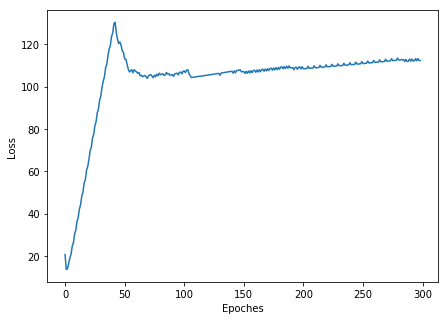

[ 0.37667907  0.7685592  -2.01361781]


In [462]:
# plot and show weights 
weights = svm_sgd_plot(x3.values, y2.values, add_bias = True)
print (weights)

In [476]:
# accuracy

def predict(features, weights):
    # sign(w.x + b)
    final = np.sign(np.dot(np.hstack((features.shape, np.ones(features.shape[0]))), weights))
    return final.astype(int)

In [477]:
pred = []
for i in x3.values:
    pred.append(predict(i, weights))

error = sum((y2 - pred) **2)
error

200

### compare with scikit learn svm

In [263]:
from sklearn import svm

model = svm.LinearSVC(loss = 'hinge')
model.fit(x3, y2)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [478]:
# accuracy using scikit learn SVM weights

weights = np.concatenate([model.coef_.reshape(2), model.intercept_])

pred = []
for i in x3.values:
    pred.append(predict(i, weights))

errorSVM = sum((y2 - pred) **2)
errorSVM

200

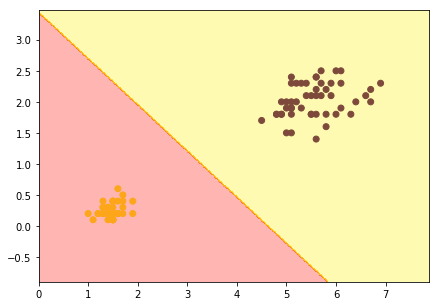

In [286]:
x = x3.iloc[:, 0]
y = x3.iloc[:, 1]
h = 0.02

x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# np.c_ Translates slice objects to concatenation along the second axis.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize = (7, 5))
plt.scatter(x3.iloc[:,0], x3.iloc[:,1], c = -1* y2)
plt.contourf(xx, yy, Z, cmap = plt.cm.autumn, alpha = 0.3)


In [327]:
# min and max within each class
# np.amin Returns the minimum of an array or minimum along an axis.
xminpos = np.amin(x[y == 1][['sepallen', 'sepalwid']])
xminneg = np.amin(x[y == -1][['sepallen', 'sepalwid']])

xmaxpos = np.amax(x[y == 1][['sepallen', 'sepalwid']])
xmaxneg = np.amax(x[y == -1][['sepallen', 'sepalwid']])

In [381]:
# for the margin boundaries w1*x1 + w2*x2 + w3 = 1 and w1*x1 + w2*x2 + w3 = -1

def hype_val(x, w, v):
    return (w[0] * x + w[2] - v) / - w[1]

def plot_db_margin(w):
    plt.scatter(x3.iloc[:,0], x3.iloc[:,1], c = -1* y2)

    # margins 
    # w1*x1 + w2*x2 + w3 = 1
    # xminx, xminy
    pos1 = hype_val(xminpos[0], w, 1)
    pos2 = hype_val(xminpos[1], w, 1)
    plt.plot([xminpos[0], xminpos[1]], [pos1, pos2], 'k')
    # xmaxx, xmaxy
    pos1 = hype_val(xmaxpos[0], w, 1)
    pos2 = hype_val(xmaxpos[1], w, 1)
    plt.plot([xmaxpos[0], xmaxpos[1]], [pos1, pos2], 'k')


    # w1*x1 + w2*x2 + w3 = -1
    # xminx, xminy
    neg1 = hype_val(xminneg[0], w, -1)
    neg2 = hype_val(xminneg[1], w, -1)
    plt.plot([xminneg[0], xminneg[1]], [neg1, neg2], 'k')


    # # the classifier 
    # # w1*x1 + w2*x2 + w3 = 0
    bd1 = hype_val(xminpos[0], w, 0)
    bd2 = hype_val(xminpos[1], w, 0)
    plt.plot([xminpos[0], xminpos[1]], [bd1, bd2], 'y--')

    bd1 = hype_val(xmaxpos[0], w, 0)
    bd2 = hype_val(xmaxpos[1], w, 0)
    plt.plot([xmaxpos[0], xmaxpos[1]], [bd1, bd2], 'y--')


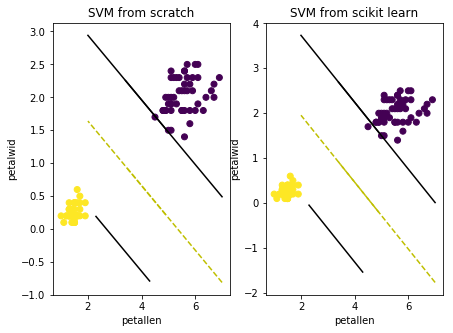

In [387]:
plt.figure(figsize = (7, 5))

plt.subplot(1, 2, 1)
# SVM from scratch weights
w = weights
plot_db_margin(w)
plt.title('SVM from scratch')
plt.xlabel('petallen')
plt.ylabel('petalwid')

plt.subplot(1, 2, 2)
# scikit learn weights 
w = np.concatenate([model.coef_.reshape(2), model.intercept_])
plot_db_margin(w)
plt.title('SVM from scikit learn')
plt.xlabel('petallen')
plt.ylabel('petalwid')